In [13]:
import json
import requests # to download some resources
import os # file operations
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns

sns.set(style="whitegrid")

In [15]:
#Loading data 
combined_data = pd.read_excel(f"../data/6-performance/combined_data_new.xlsx")

# Convert categorical yes/no answers to binary (1 for yes, 0 for no)
combined_data['chunking_binary'] = combined_data['answer_chunking'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))
combined_data['full_binary'] = combined_data['answer_full'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))
combined_data['annotation_binary'] = combined_data['answer'].apply(lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))


In [17]:
# in combined_data, delete rows where the answer is not yes or no
combined_data = combined_data[combined_data['answer'].isin(['yes', 'no'])]
combined_data = combined_data[combined_data['answer_chunking'].isin(['yes', 'no'])]


In [19]:
# Performance for yes/no questions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_full = accuracy_score(combined_data['annotation_binary'], combined_data['full_binary'])
precision_full = precision_score(combined_data['annotation_binary'], combined_data['full_binary'])
recall_full = recall_score(combined_data['annotation_binary'], combined_data['full_binary'])
f1_full = f1_score(combined_data['annotation_binary'], combined_data['full_binary'])

accuracy_chunking = accuracy_score(combined_data['annotation_binary'], combined_data['chunking_binary'])
precision_chunking  = precision_score(combined_data['annotation_binary'], combined_data['chunking_binary'])
recall_chunking  = recall_score(combined_data['annotation_binary'], combined_data['chunking_binary'])
f1_chunking  = f1_score(combined_data['annotation_binary'], combined_data['chunking_binary'])


# Print results
print(f"Accuracy_full (Yes/No Questions): {accuracy_full:.2f}")
print(f"Precision_full (Yes/No Questions): {precision_full:.2f}")
print(f"Recall_full (Yes/No Questions): {recall_full:.2f}")
print(f"F1 Score_full (Yes/No Questions): {f1_full:.2f}")

# Print results
print(f"Accuracy_chunking (Yes/No Questions): {accuracy_chunking:.2f}")
print(f"Precision_chunking (Yes/No Questions): {precision_chunking:.2f}")
print(f"Recall_chunking(Yes/No Questions): {recall_chunking:.2f}")
print(f"F1 Score_chunking (Yes/No Questions): {f1_chunking:.2f}")

Accuracy_full (Yes/No Questions): 0.91
Precision_full (Yes/No Questions): 0.92
Recall_full (Yes/No Questions): 0.97
F1 Score_full (Yes/No Questions): 0.95
Accuracy_chunking (Yes/No Questions): 0.89
Precision_chunking (Yes/No Questions): 0.89
Recall_chunking(Yes/No Questions): 0.99
F1 Score_chunking (Yes/No Questions): 0.94


### Performance, general

In [21]:
# Create a dictionary of the metrics
performance_results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Full': [accuracy_full, precision_full, recall_full, f1_full],
    'Chunking': [accuracy_chunking, precision_chunking, recall_chunking, f1_chunking]
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_results)

# Optionally, round the results for better readability
performance_df = performance_df.round(3)

# Display the DataFrame
performance_df

,Metric,Full,Chunking
0,Accuracy,0.909,0.892
1,Precision,0.923,0.889
2,Recall,0.971,0.994
3,F1 Score,0.946,0.939


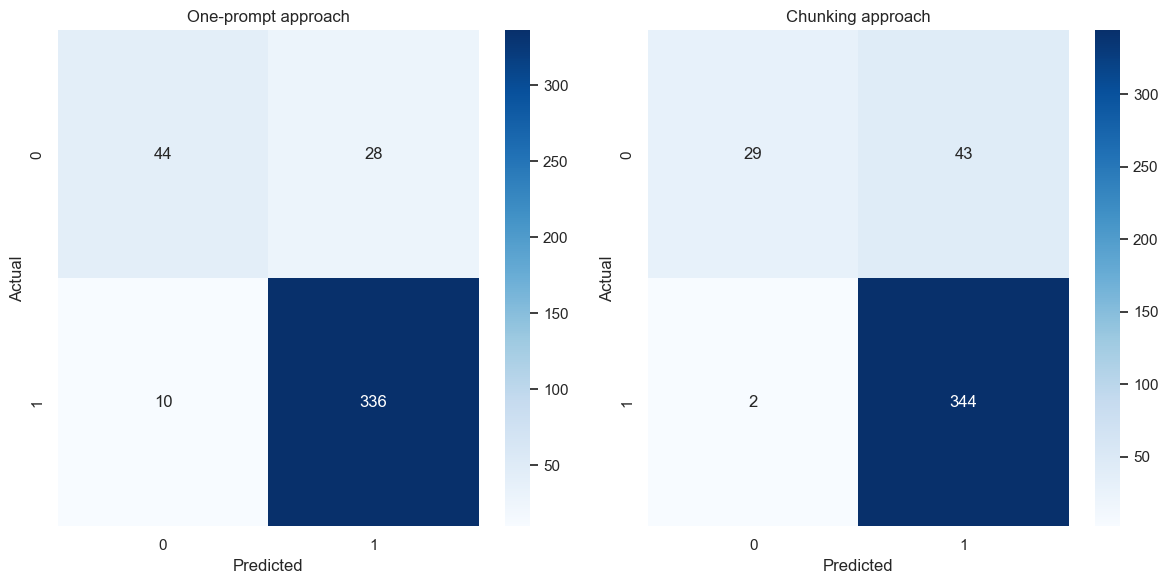

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
confusion_full = confusion_matrix(combined_data['annotation_binary'], combined_data['full_binary'])
confusion_chunking = confusion_matrix(combined_data['annotation_binary'], combined_data['chunking_binary'])

# Plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Full
sns.heatmap(confusion_full, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('One-prompt approach')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Chunking
sns.heatmap(confusion_chunking, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Chunking approach')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Performance by language and approach

### Performance by length and approach

### Performance per question and approach

In [47]:
# Create an empty list to store rows
rows = []

# Loop through each unique question
for question in combined_data['question'].unique():
    subset = combined_data[combined_data['question'] == question]
    
    # Full approach metrics
    acc_full = accuracy_score(subset['annotation_binary'], subset['full_binary'])
    prec_full = precision_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    rec_full = recall_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    f1_full = f1_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    
    # Chunking approach metrics
    acc_chunk = accuracy_score(subset['annotation_binary'], subset['chunking_binary'])
    prec_chunk = precision_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    rec_chunk = recall_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    f1_chunk = f1_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    
    # Append row
    rows.append({
        'Question': question,
        'Accuracy_Full': acc_full,
        'Precision_Full': prec_full,
        'Recall_Full': rec_full,
        'F1_Full': f1_full,
        'Accuracy_Chunking': acc_chunk,
        'Precision_Chunking': prec_chunk,
        'Recall_Chunking': rec_chunk,
        'F1_Chunking': f1_chunk
    })

# Create the DataFrame
performance_by_question_df = pd.DataFrame(rows)

# Round to 3 decimals
performance_by_question_df = performance_by_question_df.round(3)

# Display the DataFrame
performance_by_question_df


,Question,Accuracy_Full,Precision_Full,Recall_Full,F1_Full,Accuracy_Chunking,Precision_Chunking,Recall_Chunking,F1_Chunking
0,1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
3,4,0.947,1.000,0.941,0.970,0.895,0.895,1.000,0.944
4,5,0.947,1.000,0.947,0.973,1.000,1.000,1.000,1.000
5,6,0.789,0.778,1.000,0.875,0.789,0.778,1.000,0.875
6,7,0.737,0.643,1.000,0.783,0.737,0.643,1.000,0.783
7,8,0.684,0.375,0.750,0.500,0.632,0.333,0.750,0.462
8,9,0.789,0.750,0.500,0.600,0.526,0.400,1.000,0.571
9,10,0.842,1.000,0.571,0.727,0.684,0.545,0.857,0.667


### Performance by country and approach

In [79]:
# Create a list to collect each country's metrics
country_rows = []

# Loop through each country
for country in combined_data['country'].unique():
    subset = combined_data[combined_data['country'] == country]
    
    # Full approach
    acc_full = accuracy_score(subset['annotation_binary'], subset['full_binary'])
    prec_full = precision_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    rec_full = recall_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    f1_full = f1_score(subset['annotation_binary'], subset['full_binary'], zero_division=0)
    
    # Chunking approach
    acc_chunk = accuracy_score(subset['annotation_binary'], subset['chunking_binary'])
    prec_chunk = precision_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    rec_chunk = recall_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    f1_chunk = f1_score(subset['annotation_binary'], subset['chunking_binary'], zero_division=0)
    
    # Append to list
    country_rows.append({
        'Country': country,
        'Accuracy_Full': acc_full,
        'Precision_Full': prec_full,
        'Recall_Full': rec_full,
        'F1_Full': f1_full,
        'Accuracy_Chunking': acc_chunk,
        'Precision_Chunking': prec_chunk,
        'Recall_Chunking': rec_chunk,
        'F1_Chunking': f1_chunk
    })

# Create DataFrame
performance_by_country_df = pd.DataFrame(country_rows)

# Round values
performance_by_country_df = performance_by_country_df.round(3)

# Display results
performance_by_country_df


,Country,Accuracy_Full,Precision_Full,Recall_Full,F1_Full,Accuracy_Chunking,Precision_Chunking,Recall_Chunking,F1_Chunking
0,afghanistan,0.955,1.000,0.955,0.977,0.955,1.000,0.955,0.977
1,argentina,0.909,0.941,0.941,0.941,0.909,0.895,1.000,0.944
2,australia,0.909,1.000,0.900,0.947,1.000,1.000,1.000,1.000
3,barbados,0.955,0.950,1.000,0.974,0.864,0.864,1.000,0.927
4,canada,0.864,0.900,0.947,0.923,0.909,0.905,1.000,0.950
5,colombia,0.818,0.800,1.000,0.889,0.727,0.727,1.000,0.842
6,costa_rica,0.955,0.941,1.000,0.970,0.864,0.842,1.000,0.914
7,el_salvador,0.955,1.000,0.933,0.966,0.864,0.833,1.000,0.909
8,finland,0.955,0.947,1.000,0.973,0.864,0.857,1.000,0.923
9,india,1.000,1.000,1.000,1.000,0.909,0.905,1.000,0.950


### Graphs

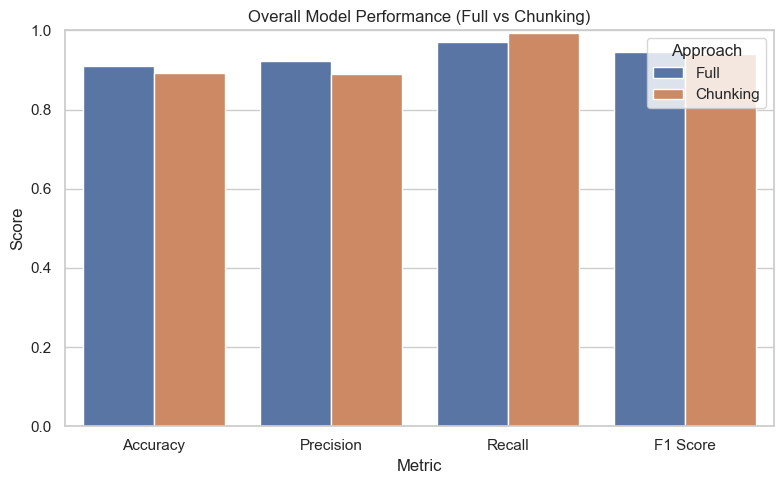

In [29]:
# Plot overall performance comparison
def plot_overall_performance(df):
    melted = df.melt(id_vars='Metric', var_name='Approach', value_name='Score')
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Metric', y='Score', hue='Approach', data=melted)
    plt.title('Overall Model Performance (Full vs Chunking)')
    plt.ylim(0, 1)
    plt.legend(title='Approach')
    plt.tight_layout()
    plt.show()

plot_overall_performance(performance_df)


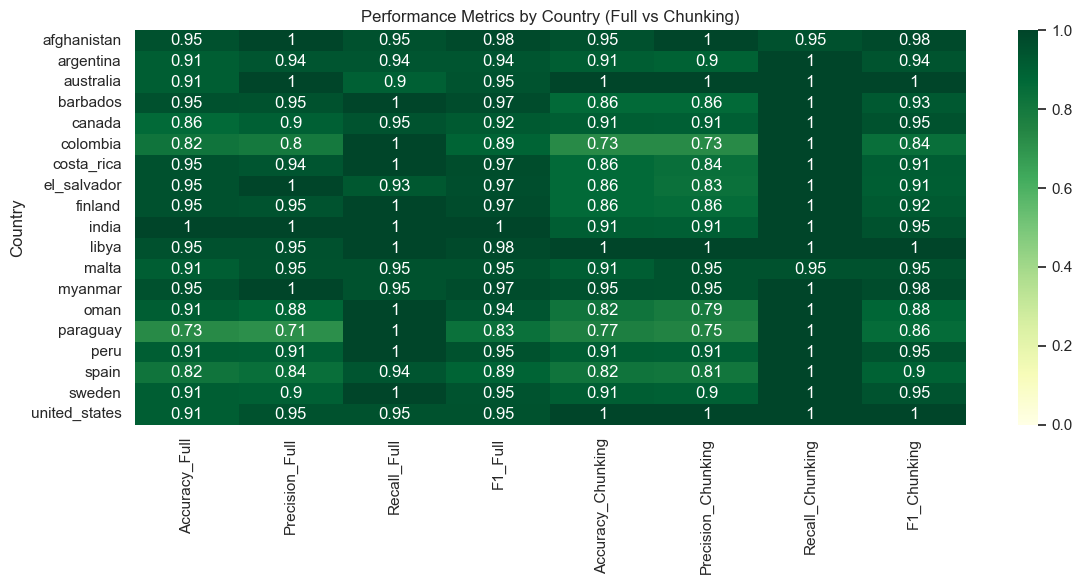

In [31]:
# Heatmap per country and metric
def plot_country_heatmap(df):
    df_heatmap = df.set_index('Country')[[
        'Accuracy_Full', 'Precision_Full', 'Recall_Full', 'F1_Full',
        'Accuracy_Chunking', 'Precision_Chunking', 'Recall_Chunking', 'F1_Chunking'
    ]]
    plt.figure(figsize=(12, 6))
    sns.heatmap(df_heatmap, annot=True, cmap="YlGn", vmin=0, vmax=1)
    plt.title('Performance Metrics by Country (Full vs Chunking)')
    plt.tight_layout()
    plt.show()

plot_country_heatmap(performance_by_country_df)


C:\Users\Dell\AppData\Local\Temp\ipykernel_21684\4023381638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Question', y='Delta_F1', data=df, palette='coolwarm')


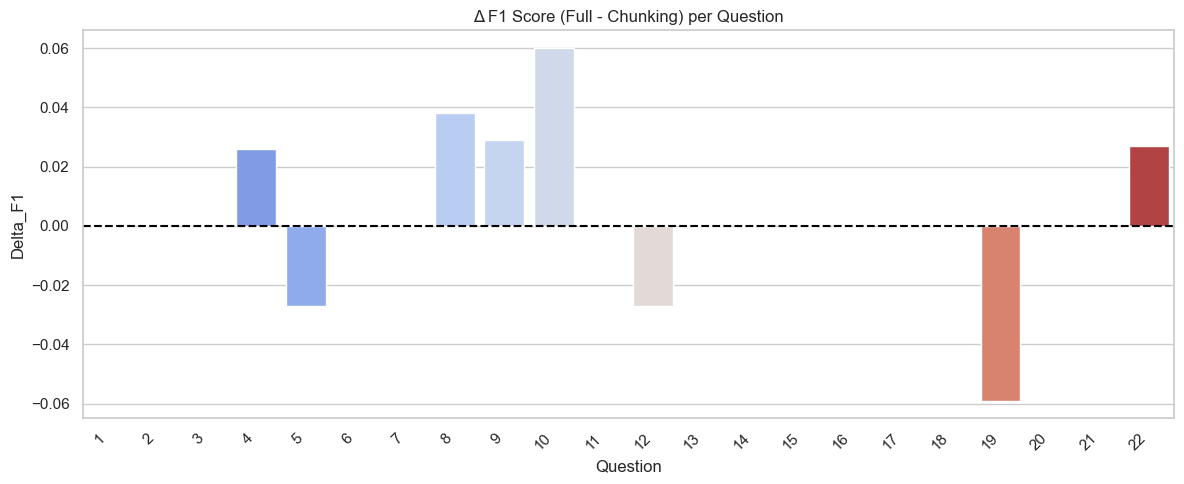

In [33]:
# F1 score difference per question
def plot_delta_question(df):
    df['Delta_F1'] = df['F1_Full'] - df['F1_Chunking']
    plt.figure(figsize=(12, 5))
    sns.barplot(x='Question', y='Delta_F1', data=df, palette='coolwarm')
    plt.axhline(0, color='black', linestyle='--')
    plt.title('Δ F1 Score (Full - Chunking) per Question')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_delta_question(performance_by_question_df)


C:\Users\Dell\AppData\Local\Temp\ipykernel_21684\936282518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Delta_F1', data=df, palette='coolwarm')


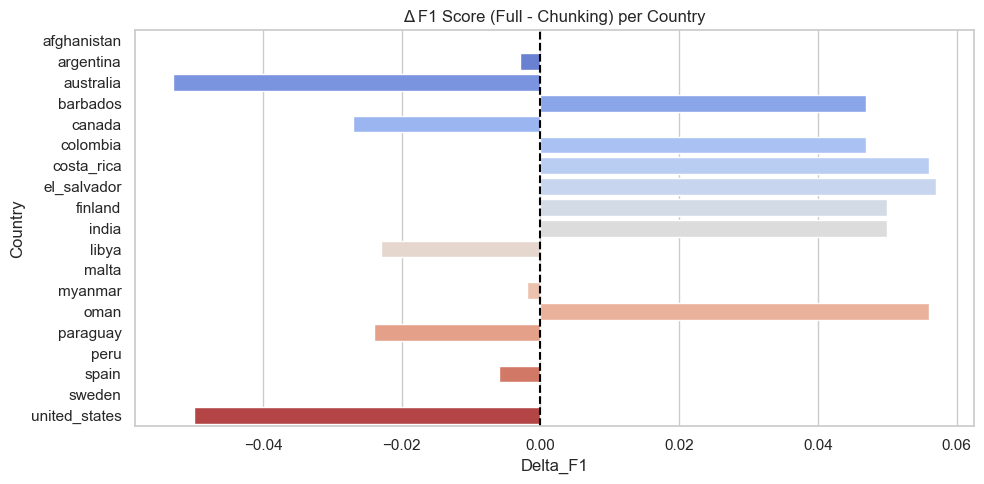

In [35]:
# F1 score difference per country
def plot_delta_country(df):
    df['Delta_F1'] = df['F1_Full'] - df['F1_Chunking']
    plt.figure(figsize=(10, 5))
    sns.barplot(y='Country', x='Delta_F1', data=df, palette='coolwarm')
    plt.axvline(0, color='black', linestyle='--')
    plt.title('Δ F1 Score (Full - Chunking) per Country')
    plt.tight_layout()
    plt.show()

plot_delta_country(performance_by_country_df)


In [95]:
import re
from textstat import flesch_kincaid_grade

# Folder where markdown files are stored
folder_mds = "../data/3-naps-md"

# Countries you're interested in
countries = [
    "Afghanistan", "Argentina", "Australia", "Barbados", "Canada", 
    "Colombia", "Costa_rica", "El_salvador", "Finland", "India", 
    "Libya", "Malta", "Myanmar", "Oman", "Paraguay", "Peru", 
    "Spain", "Sweden", "United_states"
]

# Data storage
data_list = []

# Extracting data from markdown files
for file in os.listdir(folder_mds):
    for country in countries:
        if country in file:
            with open(os.path.join(folder_mds, file), "r", encoding="utf-8") as md_file:
                content = md_file.read()

            # Extracting features
            word_count = len(content.split())
            readability = flesch_kincaid_grade(content)
            
            # Append the extracted data for this country
            data_list.append({
                "Country": country.lower(),
                "word_count": word_count,
                "readability_score": readability
            })

# Convert to DataFrame
nap_df = pd.DataFrame(data_list)

# Display the first few rows of the dataframe
print(nap_df.head())


       Country  word_count  readability_score
0  afghanistan       13646               19.4
1    argentina       12062               22.7
2    australia        6730               20.3
3     barbados        7225               18.3
4       canada       13217               16.7


In [97]:
# Merge the performance data with the nap_df containing word count and readability scores
performance_with_features_df = pd.merge(performance_by_country_df, nap_df[['Country', 'word_count', 'readability_score']], on='Country', how='left')

# Display the combined data
print(performance_with_features_df)


          Country  Accuracy_Full  Precision_Full  Recall_Full  F1_Full  \
0     afghanistan          0.955           1.000        0.955    0.977   
1       argentina          0.909           0.941        0.941    0.941   
2       australia          0.909           1.000        0.900    0.947   
3        barbados          0.955           0.950        1.000    0.974   
4          canada          0.864           0.900        0.947    0.923   
5        colombia          0.818           0.800        1.000    0.889   
6      costa_rica          0.955           0.941        1.000    0.970   
7     el_salvador          0.955           1.000        0.933    0.966   
8         finland          0.955           0.947        1.000    0.973   
9           india          1.000           1.000        1.000    1.000   
10          libya          0.955           0.955        1.000    0.977   
11          malta          0.909           0.950        0.950    0.950   
12        myanmar          0.955      

In [81]:
# Extract unique language per country from combined_data
language_df = combined_data[['country', 'language']].drop_duplicates()

# Ensure column names match before merging
language_df.rename(columns={'country': 'Country'}, inplace=True)

# Merge language into performance_with_features_df
performance_with_features_df = performance_with_features_df.merge(language_df, on="Country", how="left")

# Display updated DataFrame
print(performance_with_features_df.head())


       Country  Accuracy_Full  Precision_Full  Recall_Full  F1_Full  \
0  afghanistan          0.955           1.000        0.955    0.977   
1    argentina          0.909           0.941        0.941    0.941   
2    australia          0.909           1.000        0.900    0.947   
3     barbados          0.955           0.950        1.000    0.974   
4       canada          0.864           0.900        0.947    0.923   

   Accuracy_Chunking  Precision_Chunking  Recall_Chunking  F1_Chunking  \
0              0.955               1.000            0.955        0.977   
1              0.909               0.895            1.000        0.944   
2              1.000               1.000            1.000        1.000   
3              0.864               0.864            1.000        0.927   
4              0.909               0.905            1.000        0.950   

   word_count  readability_score  Delta_F1 language  
0         NaN                NaN     0.000  English  
1     12062.0       

In [99]:
# Compute Delta F1
performance_with_features_df['Delta_F1'] = performance_with_features_df['F1_Full'] - performance_with_features_df['F1_Chunking']

# Display the updated dataframe with Delta_F1
print(performance_with_features_df[['Country', 'F1_Full', 'F1_Chunking', 'Delta_F1']])


          Country  F1_Full  F1_Chunking  Delta_F1
0     afghanistan    0.977        0.977     0.000
1       argentina    0.941        0.944    -0.003
2       australia    0.947        1.000    -0.053
3        barbados    0.974        0.927     0.047
4          canada    0.923        0.950    -0.027
5        colombia    0.889        0.842     0.047
6      costa_rica    0.970        0.914     0.056
7     el_salvador    0.966        0.909     0.057
8         finland    0.973        0.923     0.050
9           india    1.000        0.950     0.050
10          libya    0.977        1.000    -0.023
11          malta    0.950        0.950     0.000
12        myanmar    0.974        0.976    -0.002
13           oman    0.938        0.882     0.056
14       paraguay    0.833        0.857    -0.024
15           peru    0.950        0.950     0.000
16          spain    0.889        0.895    -0.006
17         sweden    0.947        0.947     0.000
18  united_states    0.950        1.000    -0.050


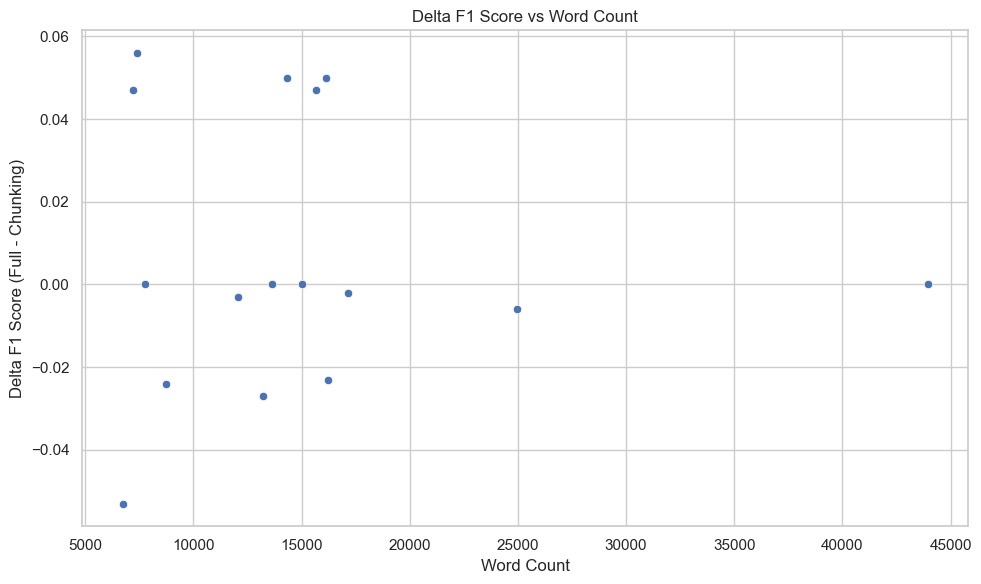

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Delta F1 Score vs Word Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='Delta_F1', data=performance_with_features_df)
plt.title('Delta F1 Score vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Delta F1 Score (Full - Chunking)')
plt.tight_layout()
plt.show()


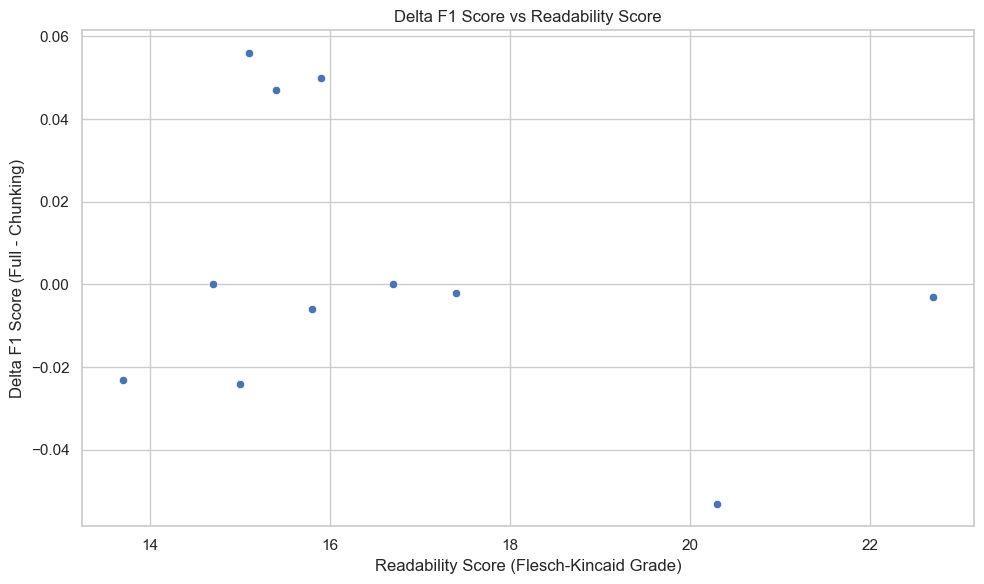

In [73]:
# Scatter plot of Delta F1 Score vs Readability Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='readability_score', y='Delta_F1', data=performance_with_features_df)
plt.title('Delta F1 Score vs Readability Score')
plt.xlabel('Readability Score (Flesch-Kincaid Grade)')
plt.ylabel('Delta F1 Score (Full - Chunking)')
plt.tight_layout()
plt.show()


In [109]:
# Extract unique language per country from combined_data
language_df = combined_data[['country', 'language']].drop_duplicates()

# Ensure column names match before merging
language_df.rename(columns={'country': 'Country'}, inplace=True)

# Merge language into performance_with_features_df
performance_with_features_df = performance_with_features_df.merge(language_df, on="Country", how="left")

# Display updated DataFrame
print(performance_with_features_df.head())


       Country  Accuracy_Full  Precision_Full  Recall_Full  F1_Full  \
0  afghanistan          0.955           1.000        0.955    0.977   
1    argentina          0.909           0.941        0.941    0.941   
2    australia          0.909           1.000        0.900    0.947   
3     barbados          0.955           0.950        1.000    0.974   
4       canada          0.864           0.900        0.947    0.923   

   Accuracy_Chunking  Precision_Chunking  Recall_Chunking  F1_Chunking  \
0              0.955               1.000            0.955        0.977   
1              0.909               0.895            1.000        0.944   
2              1.000               1.000            1.000        1.000   
3              0.864               0.864            1.000        0.927   
4              0.909               0.905            1.000        0.950   

   word_count  readability_score  Delta_F1 language  
0     13646.0               19.4     0.000  English  
1     12062.0       

                   Delta_F1  word_count  readability_score
Delta_F1           1.000000   -0.041396          -0.148307
word_count        -0.041396    1.000000          -0.168030
readability_score -0.148307   -0.168030           1.000000


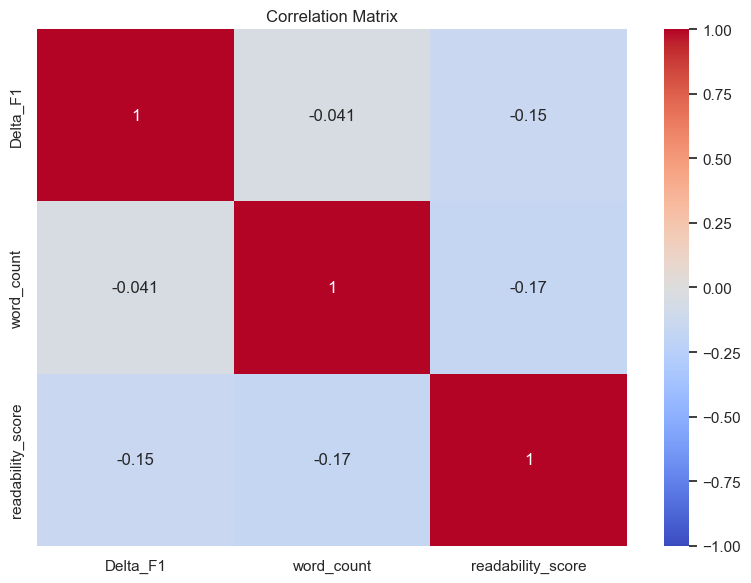

In [105]:
# Calculate the correlation matrix
correlation_matrix = performance_with_features_df[['Delta_F1', 'word_count', 'readability_score']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [111]:
# Group by language and compute mean of performance metrics
metrics_by_language = performance_with_features_df.groupby("language").agg({
    "F1_Full": "mean",
    "Accuracy_Full": "mean",
    "Precision_Full": "mean",
    "Recall_Full": "mean",
    "F1_Chunking": "mean",
    "Accuracy_Chunking": "mean",
    "Precision_Chunking": "mean",
    "Recall_Chunking": "mean"
}).reset_index()

# Round for readability
metrics_by_language = metrics_by_language.round(3)

# Display results
print(metrics_by_language)


  language  F1_Full  Accuracy_Full  Precision_Full  Recall_Full  F1_Chunking  \
0  English    0.961          0.932           0.953        0.971        0.957   
1  Spanish    0.920          0.870           0.878        0.974        0.902   

   Accuracy_Chunking  Precision_Chunking  Recall_Chunking  
0              0.924               0.927            0.992  
1              0.838               0.823            1.000  


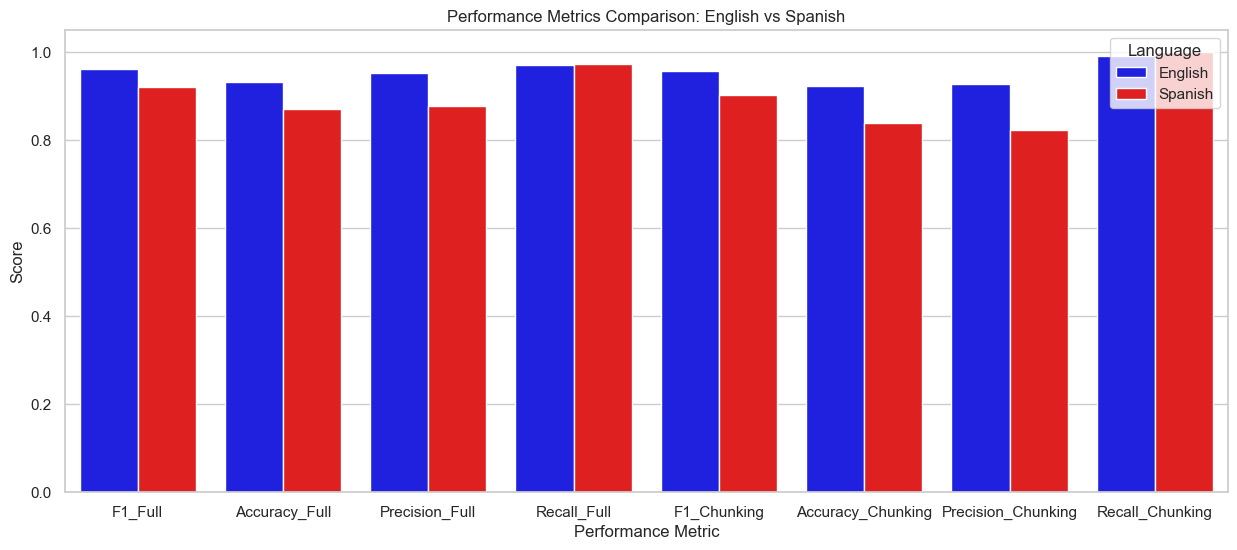

In [117]:
# Set plot style
sns.set(style="whitegrid")

# Select only English and Spanish
language_subset = metrics_by_language[metrics_by_language["language"].isin(["English", "Spanish"])]

# Melt the DataFrame for better visualization (long format)
metrics_melted = language_subset.melt(id_vars=["language"], 
                                      var_name="Metric", 
                                      value_name="Score")

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x="Metric", y="Score", hue="language", data=metrics_melted, palette=["blue", "red"])

# Add labels and title
plt.xlabel("Performance Metric")
plt.ylabel("Score")
plt.title("Performance Metrics Comparison: English vs Spanish")
plt.legend(title="Language")

# Show plot
plt.show()